# Homework assignment - Fruits

This notebook is the stub you have to fill out for the homework. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier from loading and inspecting the dataset to making something working. The section descriptions contain what to do in that step.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [canvas.elte.hu](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Task description
Your task is to implement a deep learning classifier of fruit images. The dataset contains segmented images of 60 different fruits. You'll have to implement a convolutional network.

## Rules and Comments
- This is an ML class so to pass the homework you do have to implement a working classifier, just loading the data is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course)
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID in the box below for easier identification.

**Name:** ANTIKA DAS 
**Neptun ID:** NU57PS

In [0]:
# Keras 2.3.1 has a bug in evalutation, downgrade it
%tensorflow_version 1.x
!pip install -U keras==2.2.5

TensorFlow 1.x selected.
     |████████████████████████████████| 337kB 8.5MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
# Some useful imports
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Dataset preparations
First download the data and extract it:

In [0]:
!wget http://vegesm.web.elte.hu/fruits_small.zip
!unzip fruits_small.zip > /dev/null

--2020-05-12 11:15:16--  http://vegesm.web.elte.hu/fruits_small.zip
Resolving vegesm.web.elte.hu (vegesm.web.elte.hu)... 157.181.1.225
Connecting to vegesm.web.elte.hu (vegesm.web.elte.hu)|157.181.1.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186322919 (178M) [application/zip]
Saving to: ‘fruits_small.zip’

fruits_small.zip    100%[===================>] 177.69M  3.57MB/s    in 59s     

2020-05-12 11:16:14 (3.02 MB/s) - ‘fruits_small.zip’ saved [186322919/186322919]



This will download and extract the dataset into `/content/fruits-small`. You can inspect the files in the sidebar on the left, under the *Files* tab. The dataset contains 100x100 pixel images of fruits, grouped by classes into folders. 

Notice that the dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. Make sure in the validation set the classes have a similar distribution to the training set.



Now that you have set up the dataset, it's time to look at some of the images. Create a function that randomly selects 4 images and prints them with the class names.

['Strawberry', 'Grape Pink', 'Rambutan', 'Blueberry', 'Pomelo Sweetie', 'Mandarine', 'Grapefruit White', 'Apple Golden 3', 'Plum', 'Cocos', 'Cherry 1', 'Redcurrant', 'Hazelnut', 'Peach 2', 'Lemon', 'Nut Pecan', 'Apple Pink Lady', 'Orange', 'Pear', 'Apple Braeburn', 'Cherry Rainier', 'Physalis with Husk', 'Apple Red 2', 'Passion Fruit', 'Apple Red Delicious', 'Maracuja', 'Mulberry', 'Pear Monster', 'Tomato 1', 'Pineapple Mini', 'Cherry Wax Red', 'Potato Red Washed', 'Nectarine Flat', 'Apple Red Yellow 2', 'Onion Red Peeled', 'Tomato Yellow', 'Banana Red', 'Tamarillo', 'Banana', 'Apple Golden 1', 'Grape White 2', 'Pear Williams', 'Avocado', 'Limes', 'Eggplant', 'Potato White', 'Cantaloupe 1', 'Granadilla', 'Tomato Cherry Red', 'Tomato 3', 'Pepper Yellow', 'Mango Red', 'Carambula', 'Plum 3', 'Kohlrabi', 'Pepper Green', 'Pear Forelle', 'Chestnut', 'Kaki', 'Grape White 4']


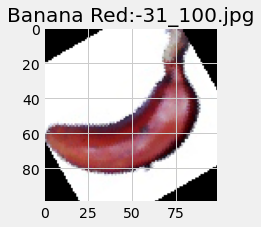

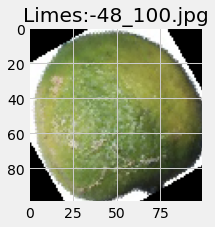

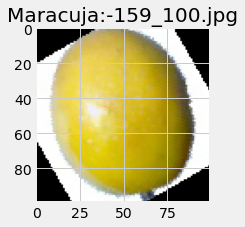

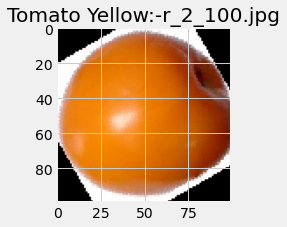

In [0]:
import os
from PIL import Image

from PIL import Image
MAIN_PATH='/content/fruits-small/train/'
from skimage import io
read_train_data=os.listdir('/content/fruits-small/train')
choose_random_picture=np.random.permutation(len(read_train_data))
for i in choose_random_picture[0:4]:

  path=MAIN_PATH +read_train_data[i]
  pth=os.listdir(path)

  choose_random_picture=np.random.permutation(len(pth))[0]
  image_path=path+ '/' +pth[choose_random_picture]
  img=io.imread(image_path)
  im = Image.fromarray(img)
  im = im.rotate(30)
  plt.figure(figsize=(3,3))
  plt.imshow(im)
  title=read_train_data[i]+":-"+pth[choose_random_picture]
  plt.title(title)

print(read_train_data)


  

  


### Splitting the dataset

Notice that the dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. 

### Preprocess the dataset

We need to augment the data, since we do not have many images per classes. Create an augmentation mechanism, data automatically does the following transformations during training:
- flip images horizontally
- rotates them
- performs zooming

In [0]:
import keras
train_dir_path = '/content/fruits-small/train'
test_dir_path= '/content/fruits-small/test' 
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=0.1,rescale=1./255,horizontal_flip=True,zoom_range=0.3,validation_split=0.15)


train_generator_iter = datagen.flow_from_directory(
        train_dir_path,
        target_size=(100, 100),
        batch_size=15,
        class_mode='categorical',
        subset='training')
val_generator_iter= datagen.flow_from_directory(train_dir_path,
        target_size=(100, 100),
        batch_size=15,
        class_mode='categorical',
    subset='validation')

test_images_iter = datagen.flow_from_directory(test_dir_path,
        target_size=(100, 100),  # all images will be resized to 100x100
        batch_size=15,
        class_mode = 'categorical')



Found 25934 images belonging to 60 classes.
Found 4534 images belonging to 60 classes.
Found 10332 images belonging to 60 classes.


## Training the network

Implement and train the following architecture. It has the following layers:

- A convolutional layer with 5x5 kernel and 32 filters
- A 2x2 MaxPooling layer
- Two convolutional layers with 3x3 kernels and 64 filters each
- A MaxPooling layer
- Another 3x3 convolutional layer with 128 filters, followed by a MaxPooling layer
- A fully connected layer of 512 units
- A final softmax layer

All layers have ReLU activations. Train the network for 15 epochs.

In [0]:
import keras
from keras import layers
from keras import models
from keras import optimizers

import keras
from keras import layers
from keras import models
from keras import optimizers

fruit_model = models.Sequential()
fruit_model.add(keras.layers.Conv2D(filters=32,kernel_size=(5, 5), activation='relu',input_shape=(100, 100, 3)))
#fruit_model.add(keras.layers.BatchNormalization())

fruit_model.add(keras.layers.MaxPooling2D((2, 2)))
fruit_model.add(keras.layers.Conv2D(filters=64,kernel_size=(3, 3), activation='relu'))
#fruit_model.add(keras.layers.BatchNormalization())

fruit_model.add(keras.layers.Conv2D(filters=64,kernel_size=(3, 3), activation='relu'))

fruit_model.add(keras.layers.MaxPooling2D(2,2))
fruit_model.add(keras.layers.Conv2D(filters=128,kernel_size=(3, 3), activation='relu'))
#fruit_model.add(keras.layers.BatchNormalization())

fruit_model.add(keras.layers.MaxPooling2D(2,2))
fruit_model.add(keras.layers.Flatten())
fruit_model.add(keras.layers.Dense(512, activation='relu'))
fruit_model.add(keras.layers.Dense(60, activation='softmax'))
 
fruit_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)      

In [0]:
fruit_model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.RMSprop(lr = 1e-4, decay = 1e-6),
              metrics= ['acc'])

In [0]:
history = fruit_model.fit_generator(train_generator_iter,
                          epochs=15,
                          validation_data = val_generator_iter,
                          verbose=1,callbacks = [
#early stopping in case the loss stops decreasing
keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





1729/1729 [==============================] - 104s 60ms/step - loss: 0.9649 - acc: 0.7243 - val_loss: 0.5661 - val_acc: 0.8355
Epoch 2/15
1729/1729 [==============================] - 89s 51ms/step - loss: 0.1504 - acc: 0.9525 - val_loss: 0.2959 - val_acc: 0.9131
Epoch 3/15
1729/1729 [==============================] - 88s 51ms/step - loss: 0.0786 - acc: 0.9761 - val_loss: 0.2651 - val_acc: 0.9334
Epoch 4/15
1729/1729 [==============================] - 88s 51ms/step - loss: 0.0536 - acc: 0.9840 - val_loss: 0.2606 - val_acc: 0.9491
Epoch 5/15
1729/1729 [==============================] - 88s 51ms/step - loss: 0.0358 - acc: 0.9892 - val_loss: 0.2213 - val_acc: 0.9488
Epoch 6/15
1729/1729 [==============================] - 88s 51ms/step - loss: 0.0330 - acc: 0.9904 - val_loss: 0.2915 - val_acc: 0.9400
Epoch 7/15
1729/1729 [==============================] - 88s 51ms/step - loss: 0.0

Now, that the model has finished training, plot the accuracy and loss over time, both for training and validation data:

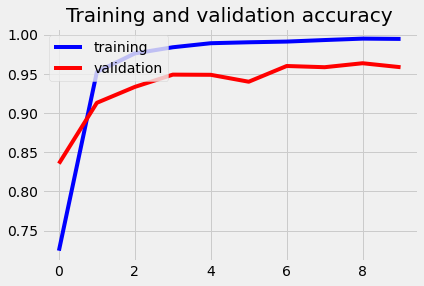

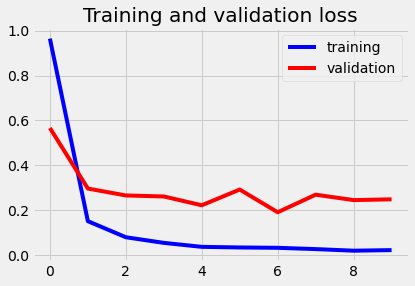

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(['training', 'validation'], loc='upper left')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(['training', 'validation'], loc='upper right')

plt.show()

How did the loss and accuracy curves change over time? What does it mean regarding the training process (i.e. overfit, underfit, etc.)? Is that a problem and how would you solve it?

**Write your answers below**

Notice the training loss(Training and validation loss graph) decreases with each epoch and the training accuracy (Training and validation accuracy graph) increases with each epoch.This isn’t the case for the validation loss and accuracy — they seem to peak after about 5-6 epochs. This is an example of overfitting.The model performs better on the training data than it does on data it has never seen before i.e validation data in this case

For this particular case, we could prevent overfitting by simply stopping the training after 5-6 epoches.Apply regularization method-Batch Normalization, increasing the traing data set and decreasing the nural network layers may work as well.Also we can increase batch size.

Finally, calculate the performance of your model on the test set:

In [0]:
# ADD YOUR CODE HERE
pred=fruit_model.predict_generator(test_images_iter,
                                   steps=500, 
                                   callbacks=None,
                                   max_queue_size=10,
                                   workers=1,
                                   use_multiprocessing=False, 
                                   verbose=0)
                                                  

In [0]:
loss,acc = fruit_model.evaluate_generator(generator=test_images_iter,steps=400,use_multiprocessing=False)
print('test loss: {}'.format(loss))
print('test accuracy: {:.2%}'.format(acc))

test loss: 0.23699296191529345
test accuracy: 95.61%


('Tamarillo', 55, '100.00%')


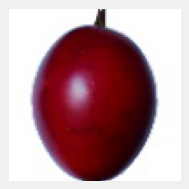

('Plum', 47, '100.00%')


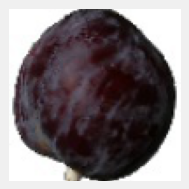

('Potato White', 51, '100.00%')


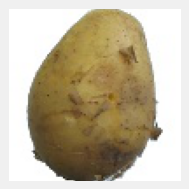

('Pineapple Mini', 46, '100.00%')


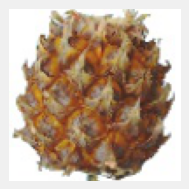

In [0]:
#PICKING UP 5 DATA IMAGES FROM TEST SET AND CHECKINH=G THE TEST ACCURACY
List=['/content/fruits-small/test/Tamarillo/22_100.jpg','/content/fruits-small/test/Plum/38_100.jpg','/content/fruits-small/test/Potato White/109_100.jpg','/content/fruits-small/test/Pineapple Mini/122_100.jpg']

for i in List:

  loaded_image = keras.preprocessing.image.load_img(path=i, target_size=(100,100,3))
  img_array = keras.preprocessing.image.img_to_array(loaded_image) / 255

  imag_array = np.expand_dims(img_array, axis = 0)

  predictions = fruit_model.predict(imag_array)

  classidx = np.argmax(predictions[0])

  label = list(train_generator_iter.class_indices.keys())[classidx]

  pred= ["{:.2f}%".format(j * 100) for j in predictions[0] ]

  print((label, classidx, pred[classidx])) 

  plt.figure(figsize=(3,3))
  plt.imshow(img_array)
  #title=a[i]+": "+b[ran]
  #plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.show()

